In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score




df = pd.read_csv("Mall_Customers.csv")
df.head()
df.info()
df.isnull().sum()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [23]:
# Drop kolom tidak relevan
X = df.drop(columns=["CustomerID", "Gender"])

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


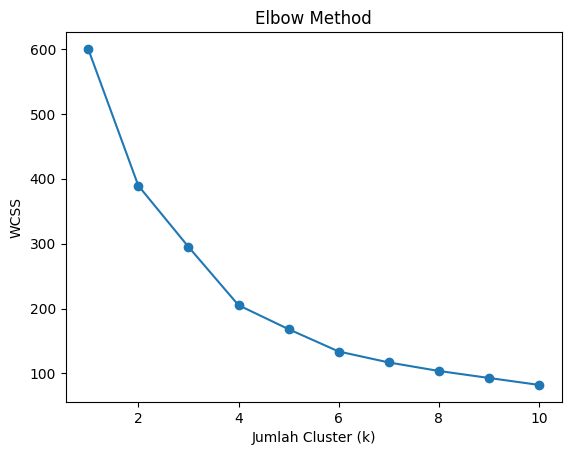

In [24]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


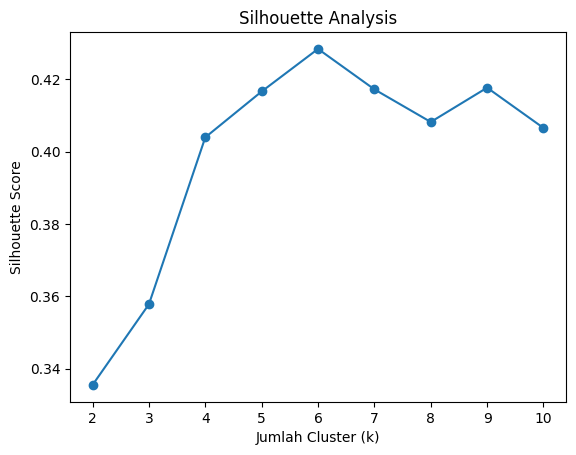

In [25]:
silhouette_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.plot(range(2,11), silhouette_scores, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()


In [26]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)


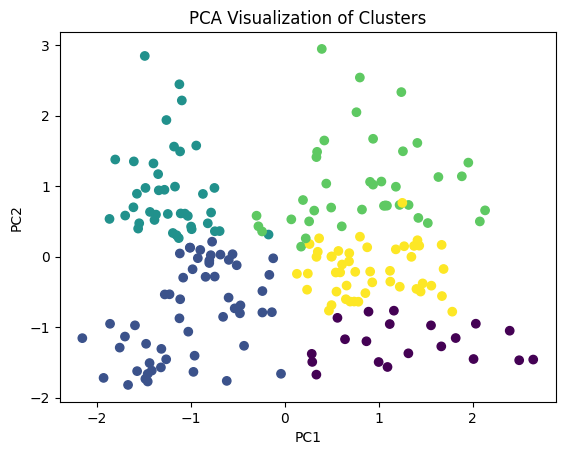

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=df["Cluster"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Visualization of Clusters")
plt.show()


In [28]:
cluster_profile = df.groupby("Cluster").mean(numeric_only=True)
cluster_profile


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,24.100000,46.250000,26.750000,18.350000
1,55.648148,25.185185,41.092593,62.240741
2,161.025000,32.875000,86.100000,81.525000
3,159.743590,39.871795,86.102564,19.358974
4,83.872340,55.638298,54.382979,48.851064


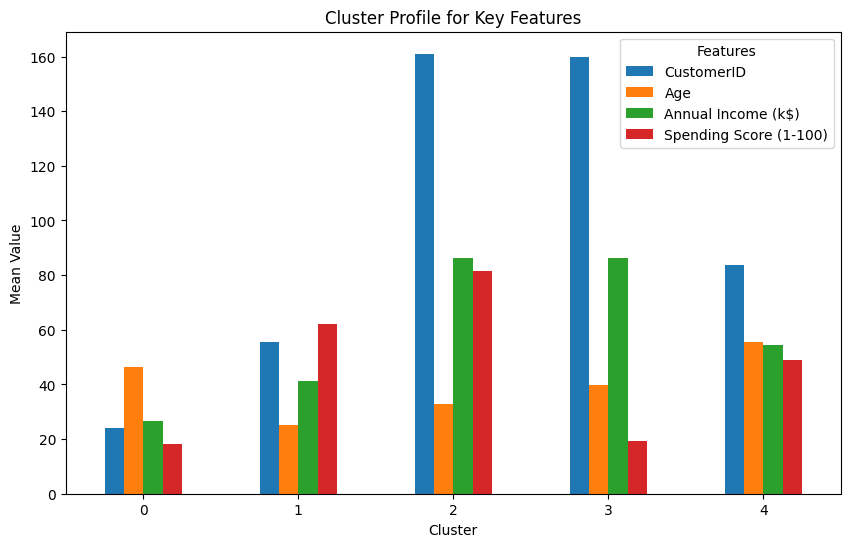

In [29]:
cluster_profile.plot(kind="bar", figsize=(10,6))
plt.title("Cluster Profile for Key Features")
plt.xlabel("Cluster")
plt.ylabel("Mean Value")
plt.xticks(rotation=0)
plt.legend(title="Features")
plt.show()